# Wavefront examples

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
#from matplotlib import rcParams 
#rcParams['figure.figsize'] = (9, 6)  # Figure size for inline display
import numpy as np
from scipy.misc import face
from pynx.wavefront import *

## Near field propagation of a simple 20x200 microns slit

<IPython.core.display.Javascript object>


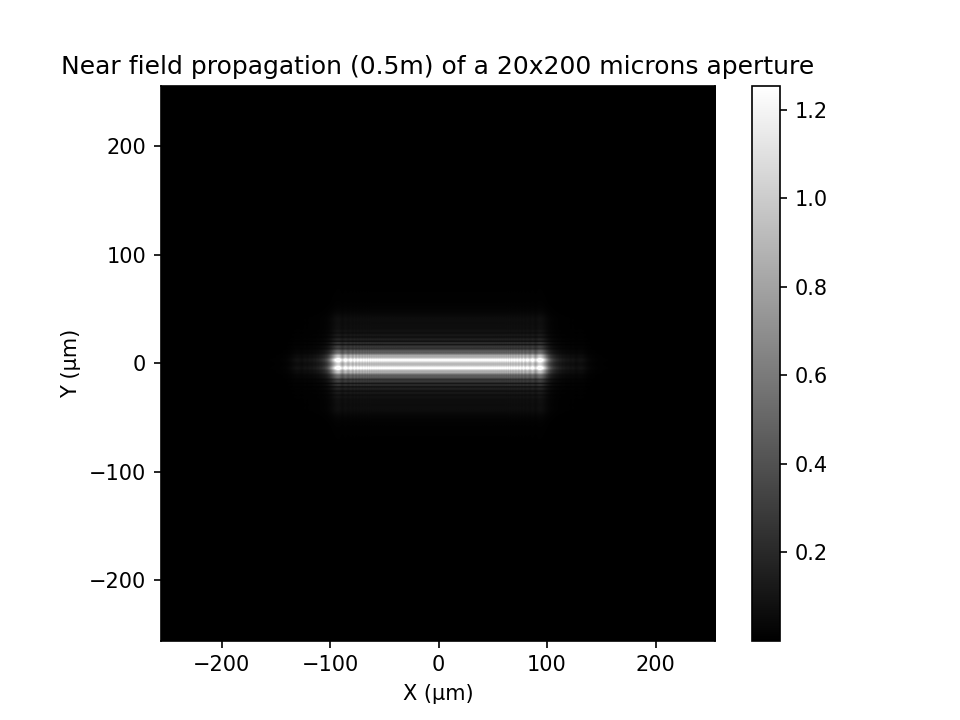

In [2]:
w = Wavefront(d=np.ones((512, 512), dtype=np.complex64), pixel_size=1e-6, wavelength=1.5e-10)
w = RectangularMask(width=200e-6, height=20e-6) * w
w = PropagateNearField(0.5) * w
# w = PropagateFRT(3) * w
w = ImshowAbs(title="Near field propagation (0.5m) of a 20x200 microns aperture") * w

## Near field propagation of a simple 40x200 microns slit (live update)

<IPython.core.display.Javascript object>


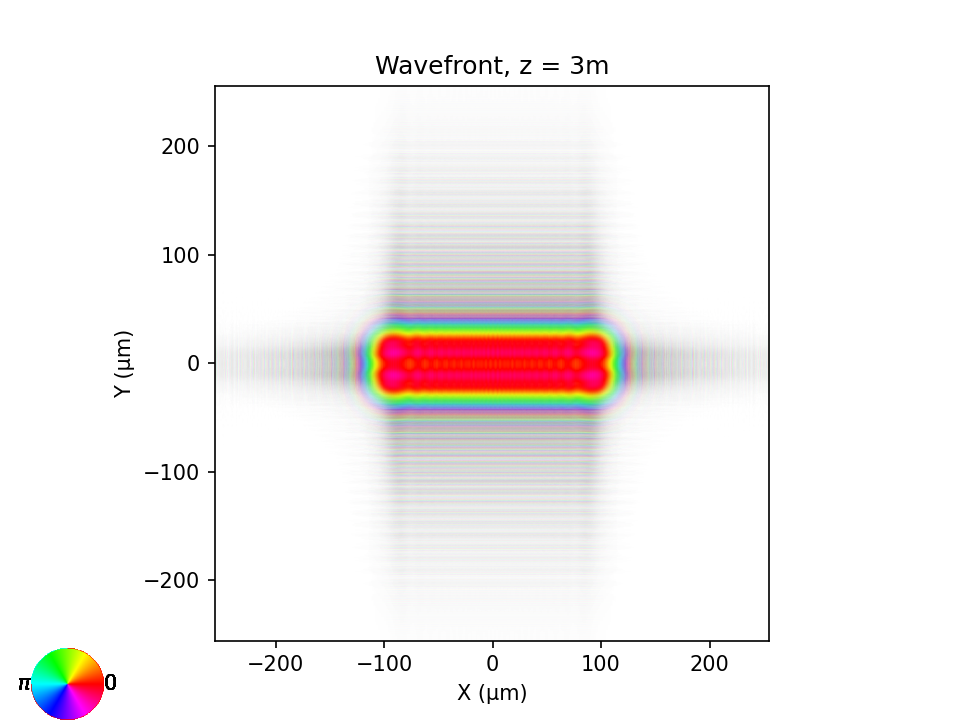

In [3]:
# of 0.2 m propagation
w = Wavefront(d=np.ones((512, 512), dtype=np.complex64), pixel_size=1e-6, wavelength=1.5e-10)
w = RectangularMask(width=200e-6, height=40e-6) * w

# Perform 15 near field propagation of 0.2m steps, displaying the complex wavefront each time
# the **15 expression allows to repeat the series of operators 15 times.
w = (ImshowRGBA(fig_num=40) * PropagateNearField(0.2))**15 * w


## Fractional Fourier transform propagation (3m) of a 43x200 microns slit
The Fractional Fourier transform allows to continuously propagate from the near-field regime (where the pixel size remains equal to the original one) to the far field regime (pixel size proportional to the propagation distance).

Note however that the wavefront cannot be propagated further, for lack of validity of the propagated phases.

<IPython.core.display.Javascript object>


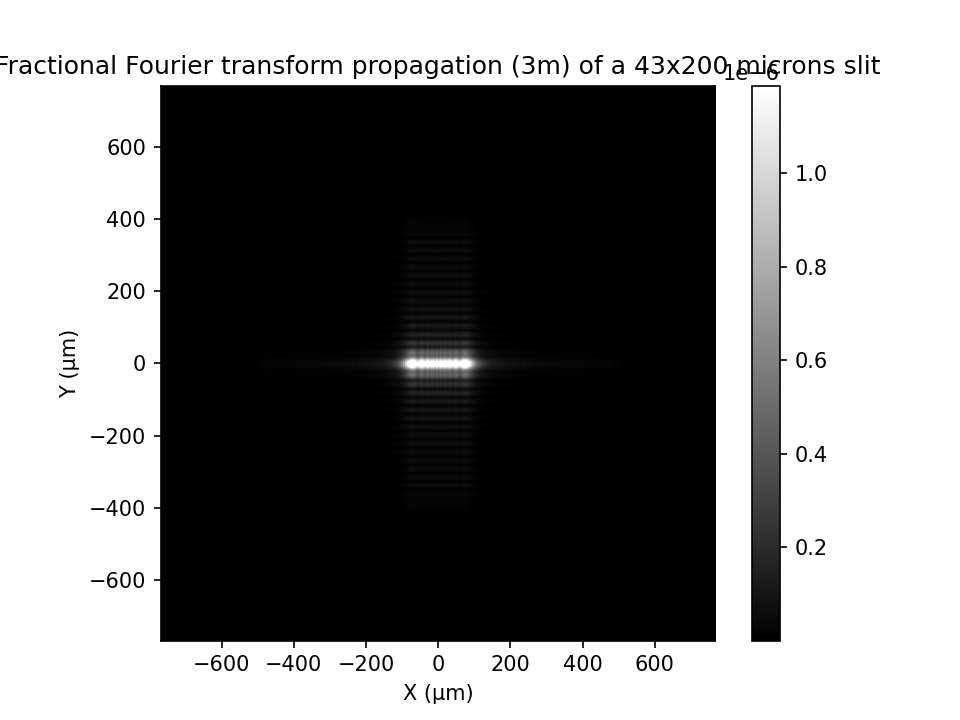

In [4]:
w = Wavefront(d=np.ones((1024, 1024), dtype=np.complex64), pixel_size=1.3e-6, wavelength=1.e-10)
w = RectangularMask(width=200e-6, height=43e-6) * w

w = PropagateFRT(10) * w
w = ImshowAbs(title="Fractional Fourier transform propagation (3m) of a 43x200 microns slit") * w

## Single slit propagation comparison
See Jacques et al (Phys. Rev. B86 (2012), 144117) single slit setup - here with simulated 1 micron pixel

Compare with figure 7 for a=43,88,142,82 microns

<IPython.core.display.Javascript object>


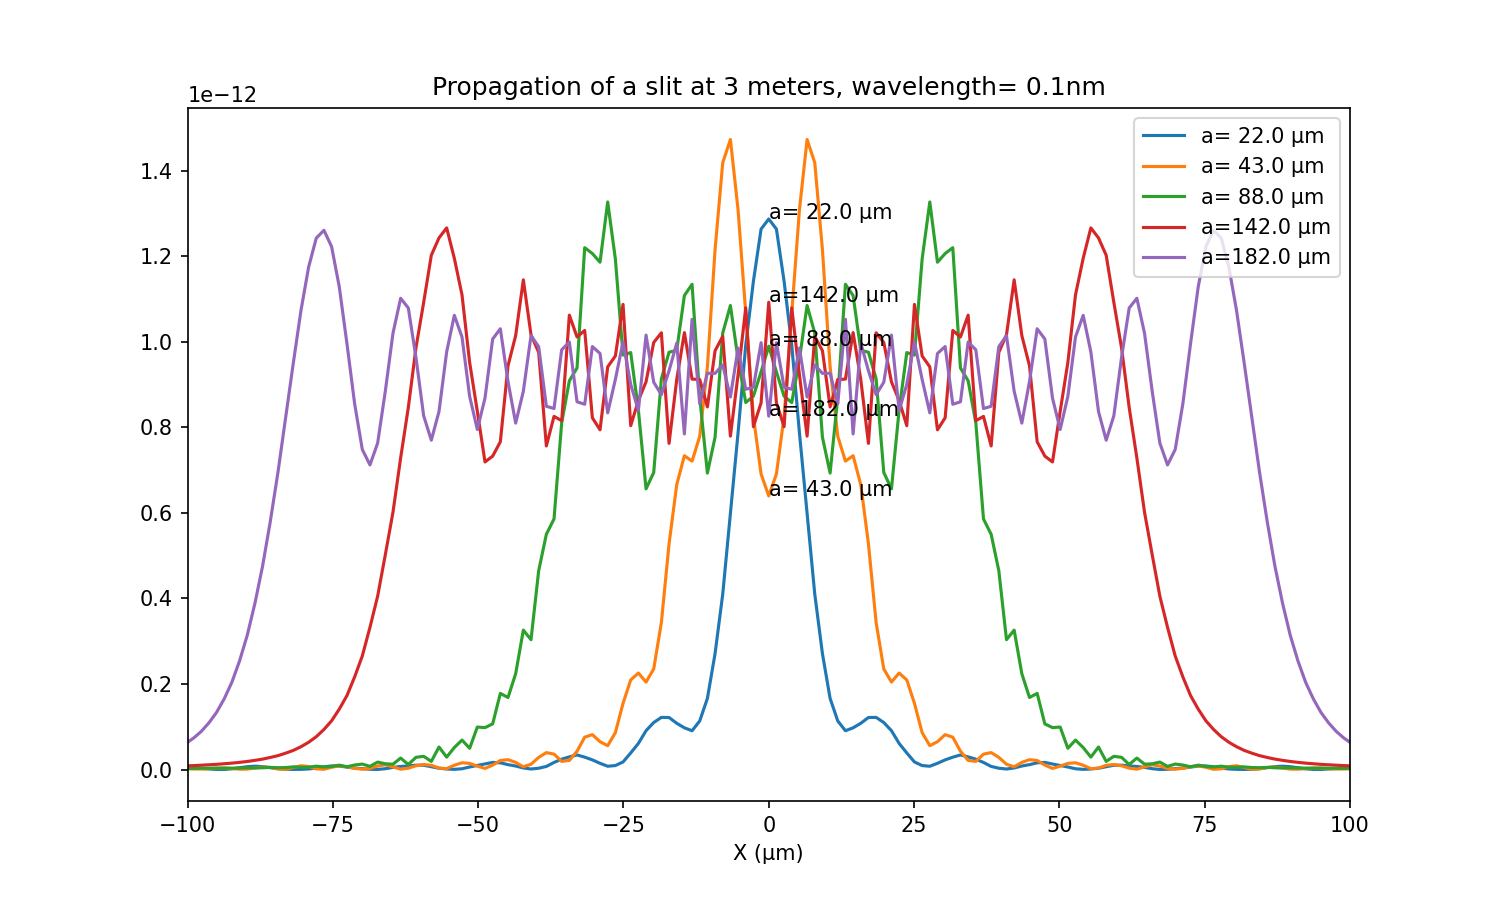

a= 44.0um, dark spot at a^2/(2pi*lambda)= 3.08m, I[0]= 0.00
a= 86.0um, dark spot at a^2/(2pi*lambda)=11.77m, I[0]= 0.00
a=176.0um, dark spot at a^2/(2pi*lambda)=49.30m, I[0]= 0.00
a=284.0um, dark spot at a^2/(2pi*lambda)=128.37m, I[0]= 0.00
a=364.0um, dark spot at a^2/(2pi*lambda)=210.87m, I[0]= 0.00


Text(0.5, 0, 'X (µm)')

In [5]:
plt.figure(figsize=(10, 6))
for a in np.array([22, 43, 88, 142, 182]) * 1e-6:
    w = Wavefront(d=np.ones((1024, 1024,), dtype=np.complex64), wavelength=1e-10, pixel_size=1.3e-6)
    w = RectangularMask(width=1, height=a) * w

    # w = PropagateNearField(3) * w
    w = PropagateFRT(3) * w
    # w = PropagateFarField(3) * w
    icalc = np.fft.fftshift(abs(w.get()[0])).mean(axis=1) ** 2
    x, y = w.get_x_y()
    plt.plot(np.fft.fftshift(y) * 1e6, icalc, label='a=%5.1f µm' % (a * 1e6))
    plt.text(0, icalc[len(icalc) // 2], 'a=%5.1f µm' % (a * 1e6))
    print('a=%5.1fum, dark spot at a^2/(2pi*lambda)=%5.2fm, I[0]=%5.2f' % (
        2 * a * 1e6, (2 * a) ** 2 / (2 * np.pi * w.wavelength), icalc[len(icalc) // 2]))
plt.title("Propagation of a slit at 3 meters, wavelength= 0.1nm")
plt.legend()
plt.xlim(-100, 100)
plt.xlabel('X (µm)')


## Propagation of a stack of A x 200 microns apertures, varying A


<IPython.core.display.Javascript object>


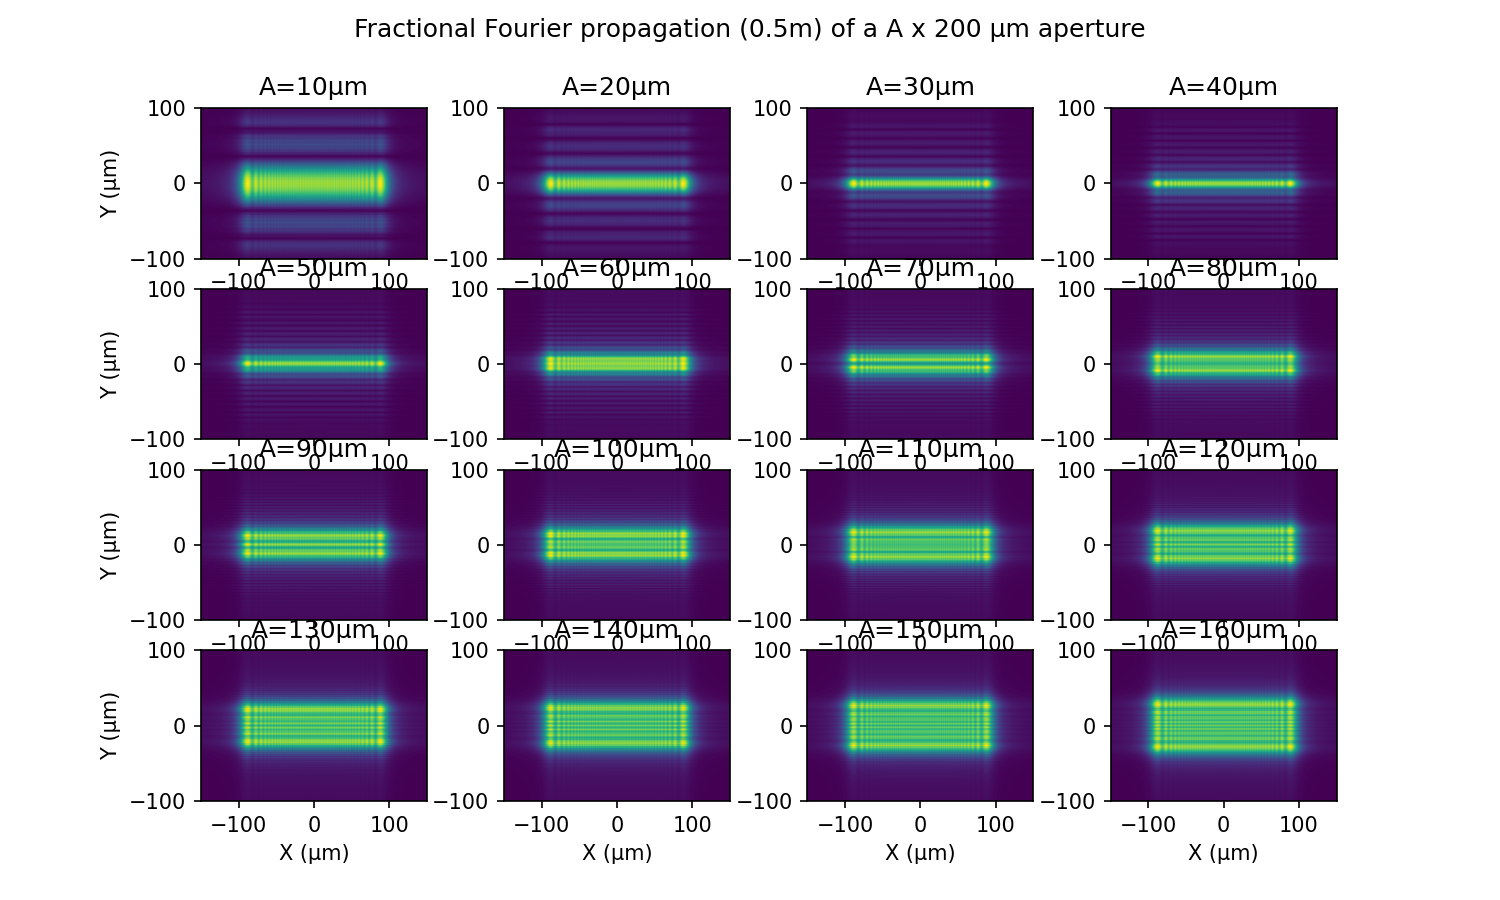

Text(0.5, 0.98, 'Fractional Fourier propagation (0.5m) of a A x 200 µm aperture')

In [6]:
w = Wavefront(d=np.ones((16, 512, 512), dtype=np.complex64), pixel_size=1e-6, wavelength=1.5e-10)
x, y = w.get_x_y()
d = w.get()
for i in range(16):
    a = 5e-6 / 2 * (i + 1)
    d[i] = (abs(y) < a) * (abs(x) < 100e-6)
w.set(d)
w = PropagateFRT(1.2) * w
plt.figure(figsize=(10, 6))
x, y = w.get_x_y()
x *= 1e6
y *= 1e6
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(abs(np.fft.fftshift(w.get()[i])), extent=(x.min(), x.max(), y.min(), y.max()), origin='lower')
    plt.title("A=%dµm" % (10 * (i + 1)))
    if i >= 12:
        plt.xlabel('X (µm)')
    if i % 4 == 0:
        plt.ylabel('Y (µm)')
    plt.xlim(-150, 150)
    plt.ylim(-100, 100)
plt.suptitle("Fractional Fourier propagation (0.5m) of a A x 200 µm aperture")


<IPython.core.display.Javascript object>


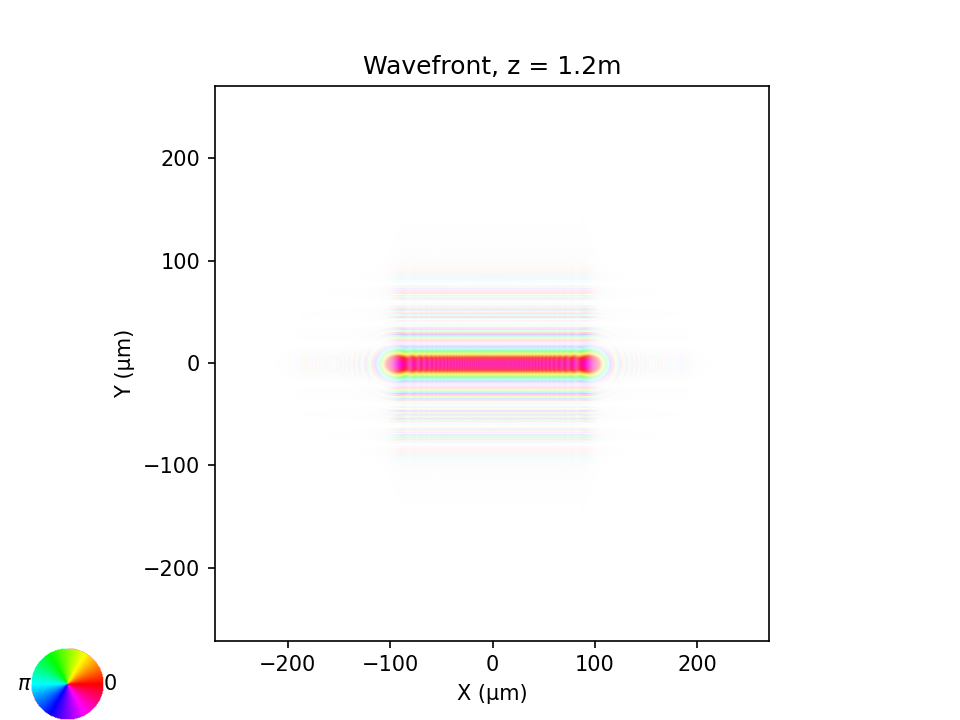

In [7]:
# Display one wavefront (i=..) in the stack
ImshowRGBA(i=1)*w

## Near field propagation of a simple 40x200 microns slit, focused (live update)
The `ThinLens` operator is used to focus he wavefront exiting from the slit

<IPython.core.display.Javascript object>


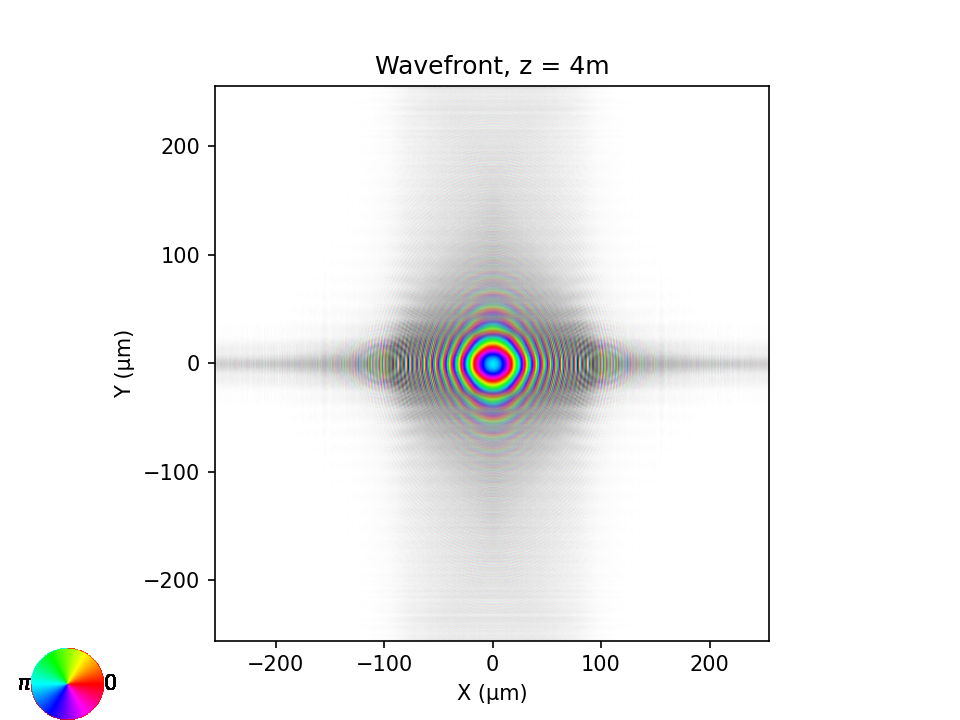

In [8]:
w = Wavefront(d=np.ones((512, 512), dtype=np.complex64), pixel_size=1e-6, wavelength=1.5e-10)
w = RectangularMask(width=200e-6, height=40e-6) * w

w = (ImshowRGBA(fig_num=60) * PropagateNearField(dz=0.1))**40 * ThinLens(2) * w

<IPython.core.display.Javascript object>


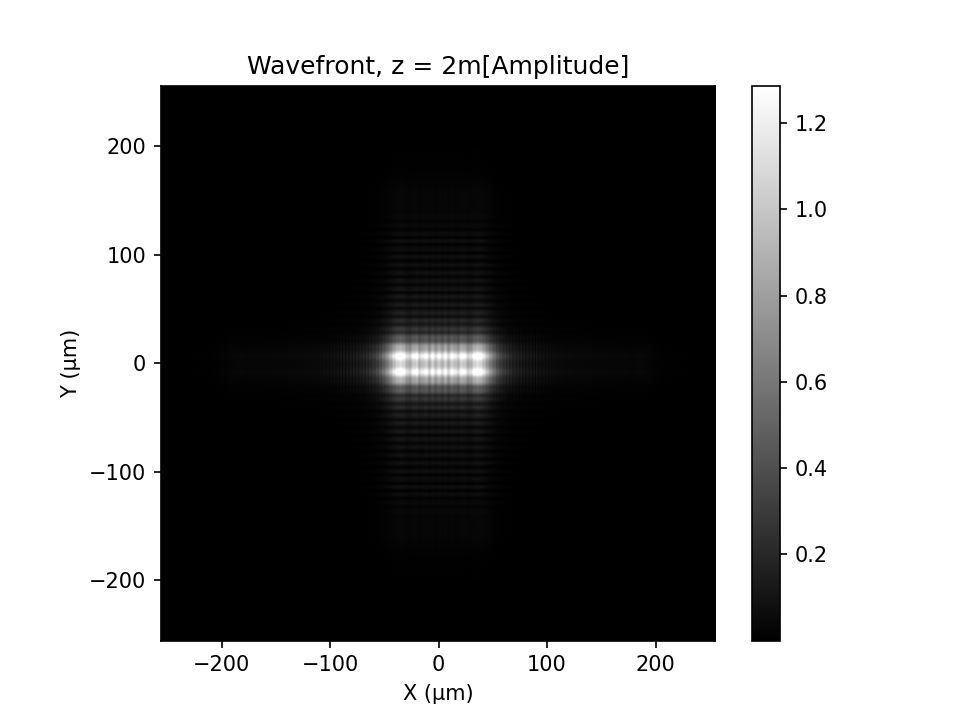

In [9]:
# Near field propagation of a simple 40x200 microns slit, displaying the propagated wavefront by steps
# of 0.2 m propagation
w = Wavefront(d=np.ones((512, 512), dtype=np.complex64), pixel_size=1e-6, wavelength=1.5e-10)
w = (ImshowAbs(fig_num=70) * PropagateNearField(dz=0.1))**20 * RectangularMask(width=100e-6, height=40e-6) * w

## Example near field propagation
Note: there are actually 3 images from RGB components, hence the `i=0` choice for the display


<IPython.core.display.Javascript object>


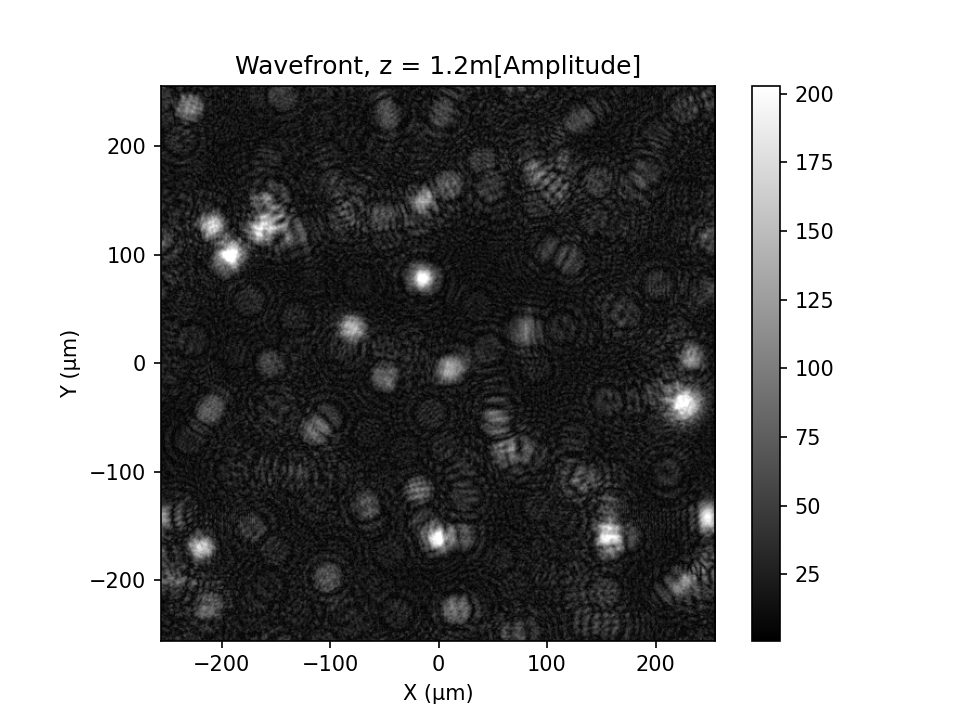

In [10]:
w = Wavefront(d="hubble", pixel_size=1e-6, wavelength=1.5e-10)
w = ImshowAbs(i=0) * PropagateNearField(dz=1.2) * w

## Simulate a transmission image

       mu * t = 0.000008
k * delta * t = 0.004189


<IPython.core.display.Javascript object>


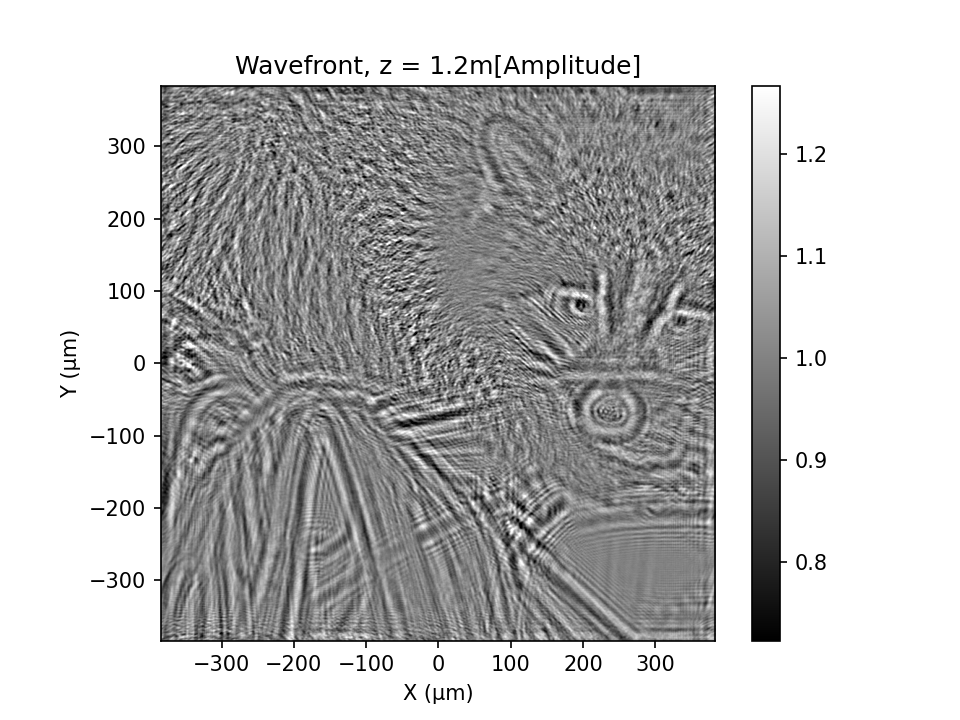

In [11]:
d0 = face()[:,:768,0]
wavelength= 1.5e-10
delta = 1e-6
beta = 1e-9
thickness = 1e-7  # base thickness, to be multiplied by image value 0..255. 
pixel_size = 1e-6
mu = 4 * np.pi * beta / wavelength
k = 2 * np.pi / wavelength
print("       mu * t = %f\nk * delta * t = %f" % (mu * thickness, k * delta * thickness))
d0 = np.exp(1j * k * (-delta + 1j * beta) * thickness * d0)

w = Wavefront(d=np.fft.fftshift(d0), pixel_size=pixel_size, wavelength=wavelength)
w = ImshowAbs() * PropagateNearField(dz=1.2) * w